In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/SuicideDeathRates.csv")

In [3]:
df2 = df.loc[:, ["UNIT_NUM", "STUB_NAME_NUM", "STUB_LABEL", "YEAR", "ESTIMATE"]]

df2 = df2[(df2["UNIT_NUM"] == 1)&((df2["STUB_NAME_NUM"] >= 4)&(df2["STUB_NAME_NUM"] <= 6))&(df2["YEAR"] >= 2000)]

In [4]:
columns = df2["STUB_LABEL"].unique().tolist()

In [5]:
data = {}

for group in columns:
    data[group] = {}
    years = df2["YEAR"][df2["STUB_LABEL"] == group].tolist()
    for year in years:
        data[group][year] = df2.loc[(df2["YEAR"] == year)&(df2["STUB_LABEL"] == group), "ESTIMATE"].values[0]

In [6]:
df_final = pd.DataFrame(data)

df_male = df_final.filter(regex = "Male")
df_male_with_Hispanic = df_male.filter(regex = "Not")
df_male_without_Hispanic = df_male.iloc[:, [0, 1, 2, 3, 6]]

df_female = df_final.filter(regex = "Female")
df_female_with_Hispanic = df_female.filter(regex = "Not")
df_female_without_Hispanic = df_female.iloc[:, [0, 1, 2, 3, 6]]

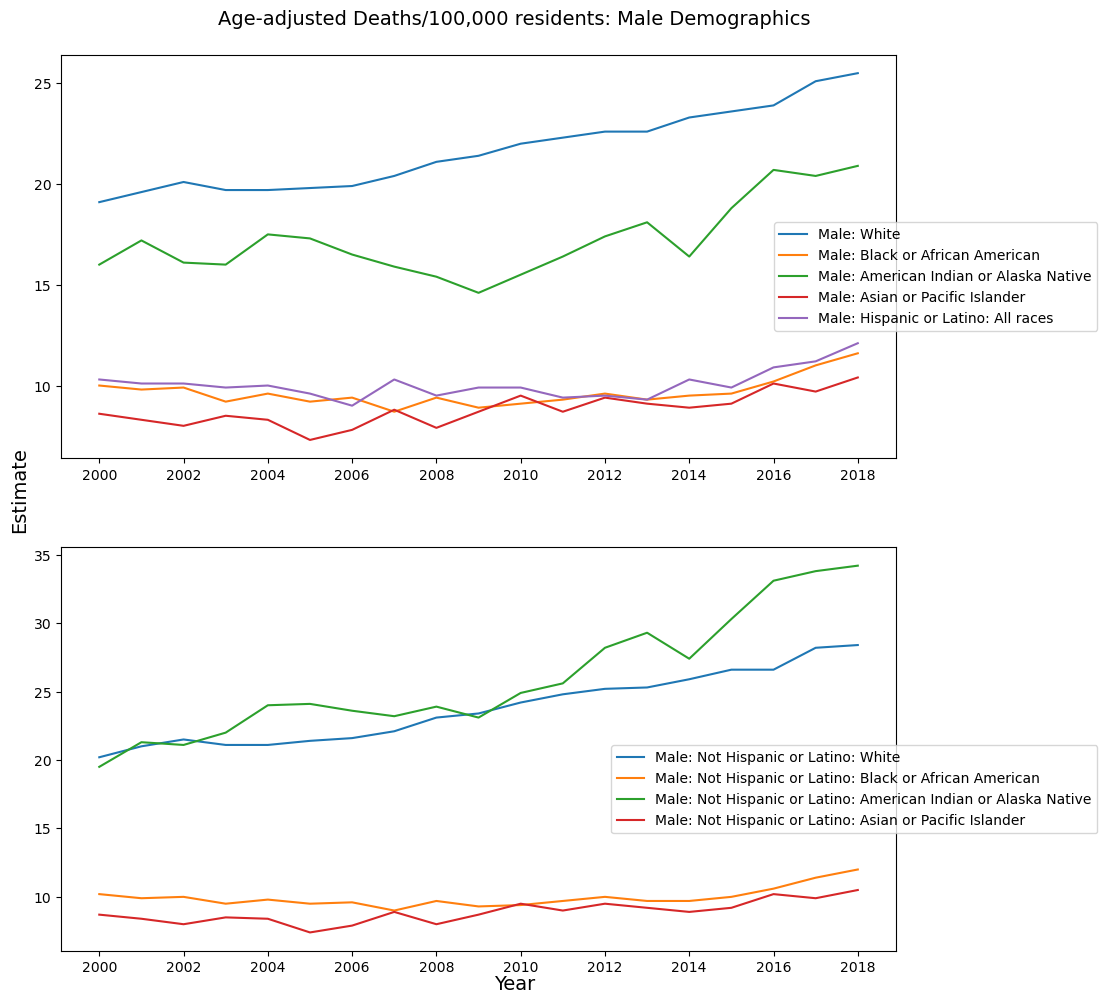

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
fig.tight_layout()
fig.suptitle("Age-adjusted Deaths/100,000 residents: Male Demographics", fontsize = 14)
ax1.plot(df_male_without_Hispanic, label = df_male_without_Hispanic.columns)
pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 0.9])
ax1.legend(loc = "center right", bbox_to_anchor = (1.25, 0.45))
ax1.locator_params(integer = True)
ax1.xaxis.set_ticks(range(2000, 2019, 2))

ax2.plot(df_male_with_Hispanic, label = df_male_with_Hispanic.columns)
pos = ax2.get_position()
ax2.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 0.9])
ax2.legend(loc = "center right", bbox_to_anchor = (1.25, 0.4))
ax2.locator_params(integer = True)
ax2.xaxis.set_ticks(range(2000, 2019, 2))
fig.text(0.5, 0.005, "Year", ha = "center", va = "center", fontsize = 14)
fig.text(0.005, 0.5, "Estimate", ha = "center", va = "center", rotation = "vertical", fontsize = 14)
plt.show()

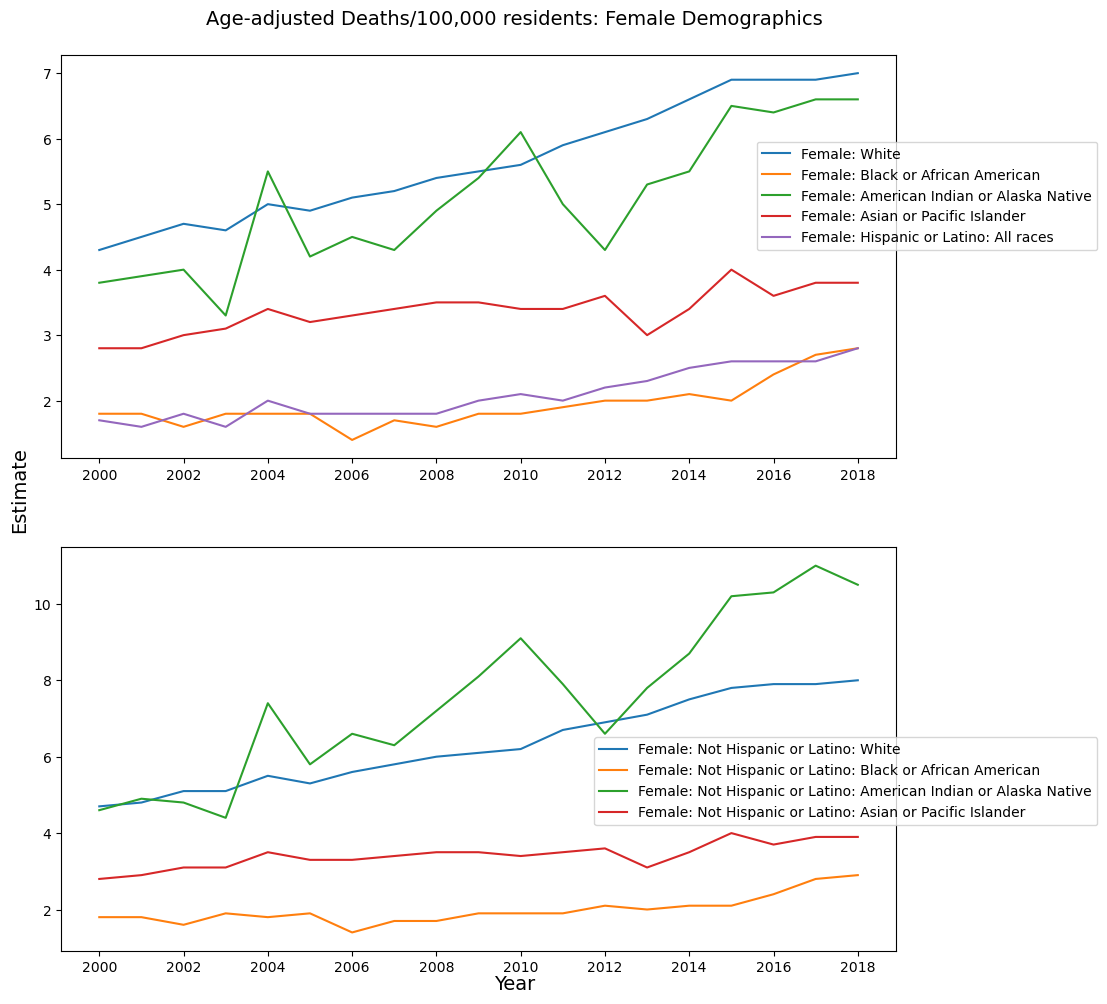

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
fig.tight_layout()
fig.suptitle("Age-adjusted Deaths/100,000 residents: Female Demographics", fontsize = 14)
ax1.plot(df_female_without_Hispanic, label = df_female_without_Hispanic.columns)
pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 0.9])
ax1.legend(loc='center right', bbox_to_anchor=(1.25, 0.65))
ax1.locator_params(integer = True)
ax1.xaxis.set_ticks(range(2000, 2019, 2))

ax2.plot(df_female_with_Hispanic, label = df_female_with_Hispanic.columns)
pos = ax2.get_position()
ax2.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 0.9])
ax2.legend(loc='center right', bbox_to_anchor=(1.25, 0.42))
ax2.locator_params(integer = True)
ax2.xaxis.set_ticks(range(2000, 2019, 2))
fig.text(0.5, 0.005, "Year", ha = "center", va = "center", fontsize = 14)
fig.text(0.005, 0.5, "Estimate", ha = "center", va = "center", rotation = "vertical", fontsize = 14)
plt.show()

In [10]:
percent_change_male_with = {}
percent_change_male_without = {}

for group in df_male_with_Hispanic.columns:
    x2 = df_male_with_Hispanic.at[2018, group]
    x1 = df_male_with_Hispanic.at[2000, group]
    percent_change = round((x2 - x1) / x1 * 100)
    percent_change_male_with[group] = percent_change
    
for group in df_male_without_Hispanic.columns:
    x2 = df_male_without_Hispanic.at[2018, group]
    x1 = df_male_without_Hispanic.at[2000, group]
    percent_change = round((x2 - x1) / x1 * 100)
    percent_change_male_without[group] = percent_change
    
percent_change_male_with = sorted(percent_change_male_with.items(), key = lambda x: x[1])
percent_change_male_without = sorted(percent_change_male_without.items(), key = lambda x: x[1])

percent_change_male_with = dict(percent_change_male_with)
percent_change_male_without = dict(percent_change_male_without)

In [11]:
percent_change_female_with = {}
percent_change_female_without = {}

for group in df_female_with_Hispanic.columns:
    x2 = df_female_with_Hispanic.at[2018, group]
    x1 = df_female_with_Hispanic.at[2000, group]
    percent_change = round((x2 - x1) / x1 * 100)
    percent_change_female_with[group] = percent_change
    
for group in df_female_without_Hispanic.columns:
    x2 = df_female_without_Hispanic.at[2018, group]
    x1 = df_female_without_Hispanic.at[2000, group]
    percent_change = round((x2 - x1) / x1 * 100)
    percent_change_female_without[group] = percent_change
    
percent_change_female_with = sorted(percent_change_female_with.items(), key = lambda x: x[1])
percent_change_female_without = sorted(percent_change_female_without.items(), key = lambda x: x[1])

percent_change_female_with = dict(percent_change_female_with)
percent_change_female_without = dict(percent_change_female_without)

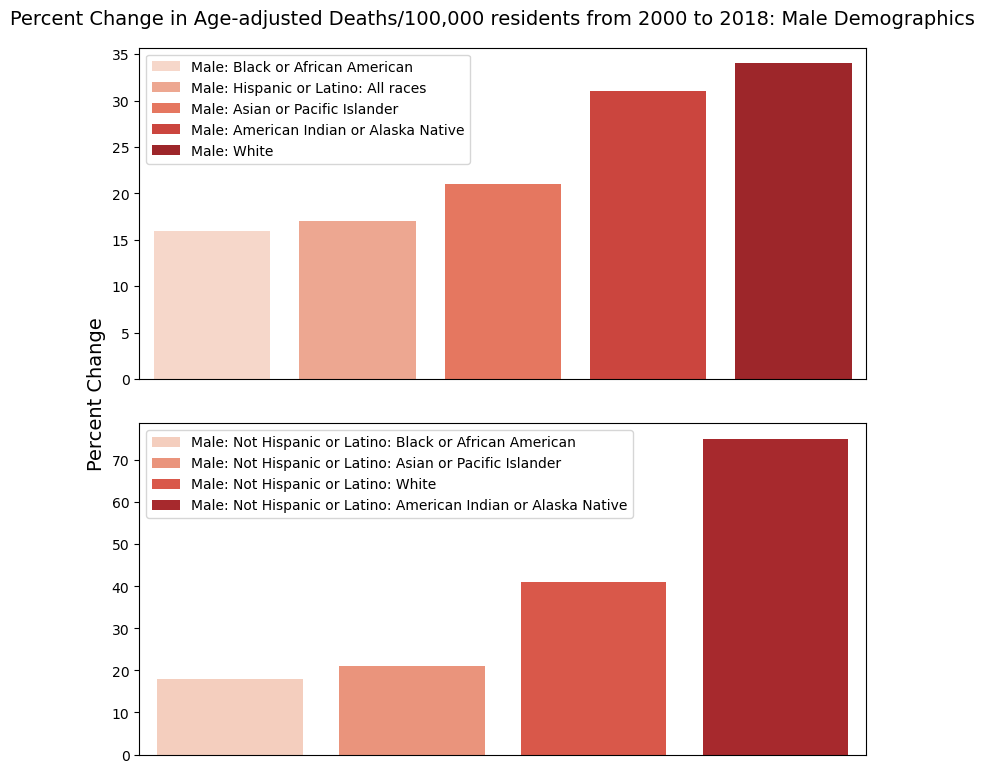

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,8))
fig.suptitle("Percent Change in Age-adjusted Deaths/100,000 residents from 2000 to 2018: Male Demographics", fontsize = 14)
fig.tight_layout()
groups = list(percent_change_male_without.keys())
values = list(percent_change_male_without.values())
sns.barplot(ax = ax1, x = groups, y = values, hue = groups, dodge = False, palette = "Reds")
ax1.set(xticklabels = [])
ax1.tick_params(bottom = False)

groups = list(percent_change_male_with.keys())
values = list(percent_change_male_with.values())
sns.barplot(ax = ax2, x = groups, y = values, hue = groups, dodge = False, palette = "Reds")
ax2.set(xticklabels = [])
ax2.tick_params(bottom = False)
fig.text(0.005, 0.5, "Percent Change", ha = "center", va = "center", rotation = "vertical", fontsize = 14)
plt.show()

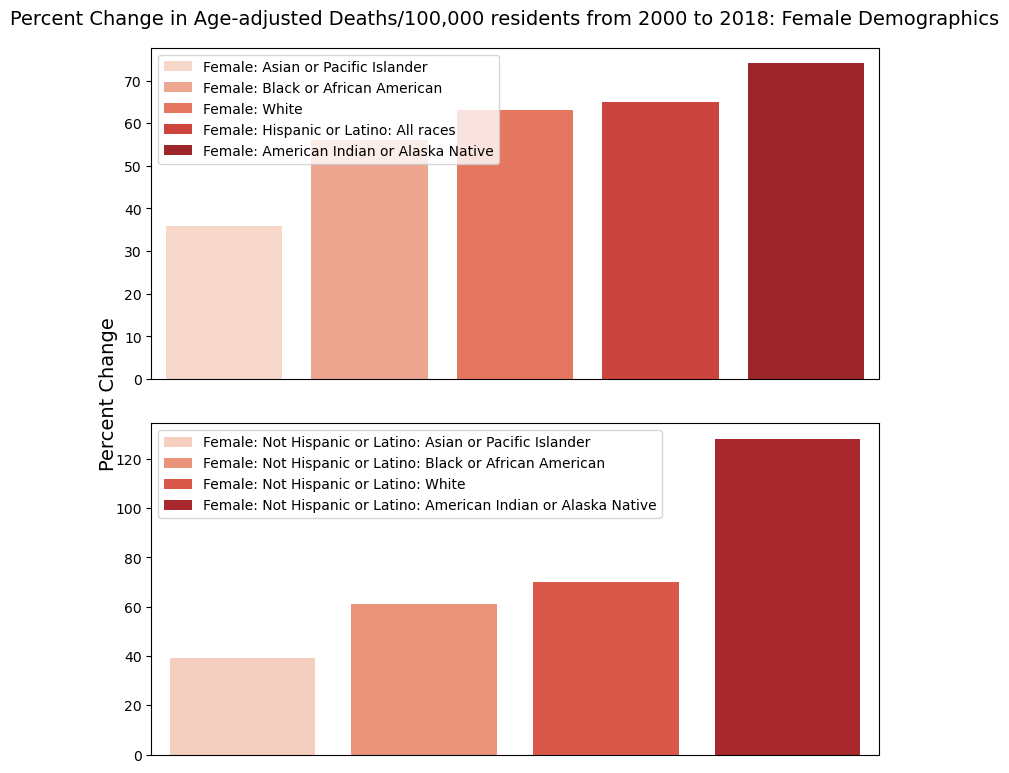

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,8))
fig.suptitle("Percent Change in Age-adjusted Deaths/100,000 residents from 2000 to 2018: Female Demographics", fontsize = 14)
fig.tight_layout()
groups = list(percent_change_female_without.keys())
values = list(percent_change_female_without.values())
sns.barplot(ax = ax1, x = groups, y = values, hue = groups, dodge = False, palette = "Reds")
ax1.set(xticklabels = [])
ax1.tick_params(bottom = False)

groups = list(percent_change_female_with.keys())
values = list(percent_change_female_with.values())
sns.barplot(ax = ax2, x = groups, y = values, hue = groups, dodge = False, palette = "Reds")
ax2.set(xticklabels = [])
ax2.tick_params(bottom = False)
fig.text(0.005, 0.5, "Percent Change", ha = "center", va = "center", rotation = "vertical", fontsize = 14)
plt.show()